Grabbing Animal Shelter Data

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

dogs_at_shelter = pd.read_csv('dogs_at_shelter.csv')

Today's Top Level Highlights


In [15]:
from datetime import datetime

today_date = datetime.today().strftime('%Y-%m-%d')
current_dogs = dogs_at_shelter[dogs_at_shelter['Scrape Date'] == today_date]

gender_counts = current_dogs['Gender'].value_counts()
print(gender_counts)

# To specifically get the count of females
female_count = gender_counts.get('Female', 0)
male_count = gender_counts.get('Male', 0) # Default to 0 if 'Female' is not found
percent_male = male_count/(male_count+female_count)

current_dogs['Weight_num'] = current_dogs['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)


smallest_dog = current_dogs['Weight_num'].min()
largest_dog = current_dogs['Weight_num'].max()
print("Number of females:", female_count)
print("Number of males:", male_count)
print("{:.2f}%".format(percent_male * 100), "of dogs currently at the shelter are male")
print("Smallest Dog:", smallest_dog, "pounds")
print("Largest Dog:", largest_dog, "pounds")


breed_counts = current_dogs['Breed'].value_counts()
print("The 10 most found breeds currently at the shelter are:",breed_counts.head(10))



location_counts = current_dogs['Kennel Location'].value_counts()
print(location_counts)
# To specifically get the count of females
foster_count = location_counts.get('FOSTER', 0)

print("There are currently", foster_count, "dog in foster.")

count_toomey = current_dogs['Kennel Location'].str.contains('TOOMEY').sum()
print("There are", count_toomey, "dogs at the Toomey Location.")

count_sick = current_dogs['Kennel Location'].str.contains('CARE').sum()
count_byrum = current_dogs['Kennel Location'].str.contains('CARE|LST|ADOPT', case=False, na=False).sum()
print("There are", count_byrum, "dogs at the Byrum Location.")
print("There are", count_sick, "sick dogs in the Dogs In Care unit.")


current_dogs['Brought to Shelter'] = pd.to_datetime(current_dogs['Brought to Shelter'])

# Calculate 'Days_at_shelter'
today = pd.to_datetime('today')
current_dogs['Days_at_shelter'] = (today - current_dogs['Brought to Shelter']).dt.days


dogs_located_at_shelter = current_dogs[current_dogs['Kennel Location'].str.contains('CARE|LST|ADOPT|TOOM')]
max_days_in_shelter = dogs_located_at_shelter['Days_at_shelter'].max()

longest_stay_dogs = dogs_located_at_shelter[dogs_located_at_shelter['Days_at_shelter'] == max_days_in_shelter]

# Print the name(s) of the dog(s) with the longest stay
print(longest_stay_dogs['Name'].tolist(), "has been at the shelter the longest at", max_days_in_shelter, "days.")


Gender
Male      215
Female    138
Name: count, dtype: int64
Number of females: 138
Number of males: 215
60.91% of dogs currently at the shelter are male
Smallest Dog: 7.0 pounds
Largest Dog: 101.0 pounds
The 10 most found breeds currently at the shelter are: Breed
Pit Bull Terrier                                     145
Pit Bull Terrier mix                                  36
Breed information is not provided by this shelter     25
Labrador Retriever                                    21
Labrador Retriever mix                                19
German Shepherd Dog mix                                9
Siberian Husky                                         6
Boxer mix                                              5
American Pit Bull Terrier                              5
Australian Cattle Dog mix                              4
Name: count, dtype: int64
Kennel Location
FOSTER        232
DOGNCARE 2     10
DOGNCARE 1      8
TOOMEYD10       2
TOOMEYD18       2
             ... 
LST 10R       

/var/folders/5l/7r0lrfyj4dn5flz3ntwmqs380000r6/T/ipykernel_6091/1354161109.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_dogs['Weight_num'] = current_dogs['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)
/var/folders/5l/7r0lrfyj4dn5flz3ntwmqs380000r6/T/ipykernel_6091/1354161109.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_dogs['Brought to Shelter'] = pd.to_datetime(current_dogs['Brought to Shelter'])
/var/folders/5l/7r0lrfyj4dn5flz3ntwmqs380000r6/T/ipykernel_6091/1354161109

Let's Vizualize


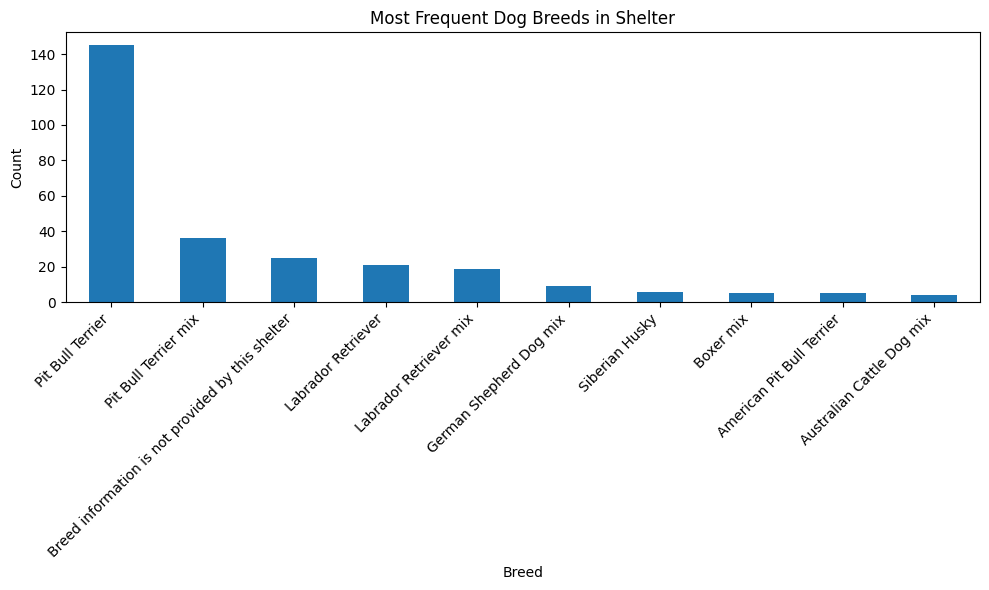

In [16]:
# Group data by breed and count occurrences
breed_counts = current_dogs['Breed'].value_counts().head(10)

# Plot 1: Bar chart of count of dogs by breed
plt.figure(figsize=(10, 6))
breed_counts.plot(kind='bar')
plt.title('Most Frequent Dog Breeds in Shelter')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pitties are by Far the most Popular



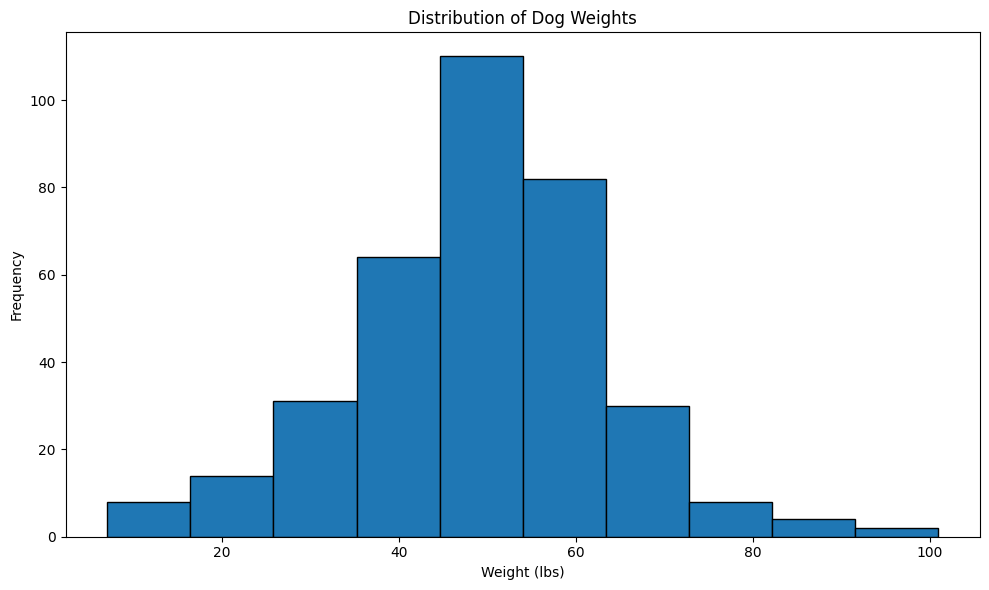

In [13]:
# Histogram of dog weights
plt.figure(figsize=(10, 6))
current_dogs['Weight_num'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Dog Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()